### Road image dataset from Google Street View
This notebook does the following:
- Get geo coordinates along the roads in New york from new york streets shape file
- Uses these coordinates to extract images from google street view

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
from fiona.crs import from_epsg
from PIL import Image

try:
    from urllib import urlretrieve as urlretrieve
except ImportError:
    from urllib.request import urlretrieve as urlretrieve
    
%matplotlib inline

In [1]:
ImageDirectory = 'Images2/' # directory to store images
api_key = "Insert Key Here" # google street view api key

In [2]:
def show_image(image):
    '''
    function to display a image within the environment
    
    parameters:
    image : path of the image to be displayed
    ''' 
    image = Image.open(image)
    f,ax = plt.subplots(figsize=(5, 5))
    plt.imshow(image)
    ax.set_axis_off()

### Download NYC Streets shapefile to get geocordinates along the streets

In [4]:
urlretrieve("https://data.cityofnewyork.us/api/geospatial/exjm-f27b?method=export&format=Shapefile", "streets.gz")

('streets.gz', <http.client.HTTPMessage at 0x7f15b9953e10>)

In [5]:
!unzip streets.gz

Archive:  streets.gz
  inflating: geo_export_288bbd6e-6143-4abc-acb4-29db2a192a05.dbf  
  inflating: geo_export_288bbd6e-6143-4abc-acb4-29db2a192a05.shp  
  inflating: geo_export_288bbd6e-6143-4abc-acb4-29db2a192a05.shx  
  inflating: geo_export_288bbd6e-6143-4abc-acb4-29db2a192a05.prj  


In [3]:
streets_shp = gpd.read_file("geo_export_288bbd6e-6143-4abc-acb4-29db2a192a05.shp")

### Select all streets in Manhattan only with ~ 25-50 percentile street width

In [4]:
streets_shp[(streets_shp["borocode"]=="1")].describe()

,frm_lvl_co,l_blkfc_id,physicalid,r_blkfc_id,rw_type,shape_leng,st_width,to_lvl_co
count,13316.000000,1.331600e+04,13316.000000,1.331600e+04,13316.000000,13316.000000,13316.000000,13316.000000
mean,13.410859,9.451733e+08,74799.610844,9.437973e+08,2.525608,346.145449,31.465605,13.421072
std,1.974741,5.508365e+08,65248.460461,5.510721e+08,3.035554,579.748553,18.884333,1.981932
min,4.000000,0.000000e+00,3.000000,0.000000e+00,1.000000,4.511256,0.000000,4.000000
25%,13.000000,2.122616e+08,3853.750000,2.122617e+08,1.000000,122.082389,22.000000,13.000000
50%,13.000000,1.222605e+09,77316.500000,1.222605e+09,1.000000,260.746213,30.000000,13.000000
75%,13.000000,1.322603e+09,133026.250000,1.322603e+09,3.000000,417.116432,42.000000,13.000000
max,26.000000,1.922616e+09,185075.000000,1.922616e+09,14.000000,26573.752668,120.000000,26.000000


In [5]:
streets_shp.head()

,bike_lane,bike_trafd,borocode,date_creat,time_creat,frm_lvl_co,full_stree,l_blkfc_id,l_high_hn,l_low_hn,...,rw_type,shape_leng,snow_pri,st_label,st_name,st_width,status,to_lvl_co,trafdir,geometry
0,None,None,2,2014-08-19,00:00:00.000,13.0,MITSUBISHI WILD WETLAND TRL,0.000000e+00,None,None,...,6.0,1026.077523,None,MITSUBISHI WILD WETLAND TRL,MITSUBISHI WILD WETLAND,0.0,2,13.0,NV,LINESTRING (-73.87861544017795 40.861915301539...
1,None,None,4,2007-11-29,00:00:00.000,13.0,28 AVE,1.122612e+08,215-027,215-001,...,1.0,258.859740,H,28 AV,28,35.0,2,13.0,TW,LINESTRING (-73.7729030190404 40.7778042809822...
2,2,TW,3,2007-11-29,00:00:00.000,13.0,SCHERMERHORN ST,1.922604e+09,399,317,...,1.0,609.424375,C,SCHERMERHORN ST,SCHERMERHORN,50.0,2,13.0,TW,LINESTRING (-73.98181677514282 40.687329801759...
3,None,None,4,2007-11-29,00:00:00.000,13.0,QUEENS BLVD,9.226172e+07,120-011,120-011,...,1.0,47.399228,C,QUEENS BLVD,QUEENS,40.0,2,13.0,TF,LINESTRING (-73.8300230194527 40.7140059978106...
4,None,None,2,2007-11-29,00:00:00.000,13.0,ARLINGTON AVE,1.522605e+09,5699,5631,...,1.0,454.932922,H,ARLINGTON AV,ARLINGTON,42.0,2,13.0,TW,LINESTRING (-73.90711253281893 40.905186250792...


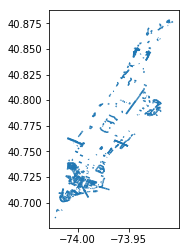

In [6]:
streets_shp[(streets_shp["borocode"]=="1")&(streets_shp["st_width"]>20)&(streets_shp["st_width"]<30)].plot()

In [7]:
mh_streets = streets_shp[(streets_shp["borocode"]=="1")&(streets_shp["st_width"]>20)&(streets_shp["st_width"]<30)]['geometry']

In [30]:
mh_streets = streets_shp[(streets_shp["st_width"]>20)&(streets_shp["st_width"]<30)]['geometry']

In [8]:
mh_streets.shape

(1707,)

In [15]:
%%time
index = range(1707)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 10.5 µs


### Download images along the streets. At each point four images for four angles are taken (90,180,270,360).
#### Filename will be "lat_lon_angle.png"

In [17]:
%%time
t=0

for street in mh_streets.get_values()[index]:
    if t % 100 == 1:
        print(t)
    t += 1
    for i in np.arange(0,len(street.xy[0]),5):
        x = street.xy[0][i]
        y = street.xy[1][i]
        point = shapely.geometry.Point(x,y)
        urlretrieve("https://maps.googleapis.com/maps/api/streetview?size=600x600&location="+str(point.y)+","+str(point.x)+"&fov=90&heading=90&pitch=10&key="+api_key, ImageDirectory+str(point.y)+"_"+str(point.x)+"_90.png")
        urlretrieve("https://maps.googleapis.com/maps/api/streetview?size=600x600&location="+str(point.y)+","+str(point.x)+"&fov=90&heading=180&pitch=10&key="+api_key, ImageDirectory+str(point.y)+"_"+str(point.x)+"_180.png")
        urlretrieve("https://maps.googleapis.com/maps/api/streetview?size=600x600&location="+str(point.y)+","+str(point.x)+"&fov=90&heading=270&pitch=10&key="+api_key, ImageDirectory+str(point.y)+"_"+str(point.x)+"_270.png")
        urlretrieve("https://maps.googleapis.com/maps/api/streetview?size=600x600&location="+str(point.y)+","+str(point.x)+"&fov=90&heading=360&pitch=10&key="+api_key, ImageDirectory+str(point.y)+"_"+str(point.x)+"_360.png")

1
101
201
301
401
501
601
701
CPU times: user 1min 38s, sys: 7.1 s, total: 1min 45s
Wall time: 15min 49s
